# Analysis Gestalt appreciation & numerosity estimation experiment



**Researchers: Elise Berbiers (MA student), Rebecca Chamberlain, Sander Van de Cruys**
___


Replication & extension of experiment 1 in: 

> Topolinski, S., Erle, T. M., & Reber, R. (2015). Necker’s smile: Immediate affective consequences of early perceptual processes. Cognition, 140, 1–13.

Notes: 

* All errorbars are **95% CIs**
* 30 coherent *"Gestalt"* images, 30 *scrambled* versions, 23 *inverted* Gestalt images (7 images don't have a singular canonical orientation).
* On the construction of the scrambled stimuli Topolinski & Strack write: 
> "Following Volz and von Cramon (2006), these stimuli were visually degraded by a filter that masked the black picture on the white background by increasing the white pixels by 75%. These pictures were the object condition (Volz & von Cramon, 2006) since they depicted visually degraded real objects. Then, these pictures were divided into nine equal rectangles (3x3); and these rectangles were randomly rotated within the picture (Volz & von Cramon, 2006; cf., Bower et al., 1990; Wippich, 1994). Thus, these pictures contained the same pixel information as in the object condition and even contained local collinearities (Volz & von Cramon, 2006), but the picture as a whole depicted a physically impossible and thus meaningless object. These pictures were used in the nonobject condition."

### Table of contents

* [Importing data](#Importing-data)
* [Appreciation experiment](#Appreciation-experiment)
* [Numerosity experiment](#Numerosity-experiment)
* [Checking for low-level structural measures of the test images](#Checking-for-low-level-structural-measures-of-the-test-images)

In [1]:
import pandas as pd
from pandas import DataFrame
from psychopy import data, core, gui, misc
import numpy as np
import seaborn as sns
#from ggplot import *
from scipy import stats
import matplotlib as mpl
mpl.use('pdf')
import statsmodels.formula.api as smf
import statsmodels.api as sm
from __future__ import division

from matplotlib import rcParams
rcParams['font.family'] = 'ubuntu'
sns.set(style="whitegrid", color_codes=True)
sns.set_context("talk")

from pivottablejs import pivot_ui
%pylab inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Importing data

In [12]:
# get data file names
files = gui.fileOpenDlg("../data")

dfs = []

for filename in files:
    
    #print(filename)
    df = pd.read_table(filename, sep=",") #only Appreciation trials 85
   
    dfs.append(df)
    
    
df = pd.concat(dfs, ignore_index=True)    

In [13]:
len(df)

12397

In [14]:
dfApp = df[pd.notnull(df.images)]       
dfNum = df[pd.notnull(df.imgA)]

print ('total len:', len(dfApp))
print ('total len:', len(dfNum))

#df.to_csv('partialsetApril2016' + '.csv', sep='\t')


#add var for img
dfApp.loc[:,"img"]= dfApp.images.str.extract("(\d+)")
dfNum.loc[:,"img"]= dfNum.imgA.str.extract("(\d+)")

('total len:', 6391)
('total len:', 5852)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


# Appreciation experiment


Relevant vars:

* condition
* rating.response
* rating.rt

In [15]:
dfApp = dfApp.rename(columns={'rating.response': 'rating'})
print(dfApp.columns)



Index([u'images', u'condition', u'imgB', u'imgA', u'trials.thisRepN',
       u'trials.thisTrialN', u'trials.thisN', u'trials.thisIndex',
       u'numLoop.thisRepN', u'numLoop.thisTrialN', u'numLoop.thisN',
       u'numLoop.thisIndex', u'response.keys', u'response.rt', u'rating',
       u'rating.rt', u'key_resp_2.keys', u'key_resp_2.rt', u'numResp.keys',
       u'numResp.corr', u'numResp.Alocation', u'numResp.rt', u'date',
       u'frameRate', u'expName', u'session', u'participant', u'Unnamed: 27',
       u'img'],
      dtype='object')


### Does gestaltness influence appreciation? 

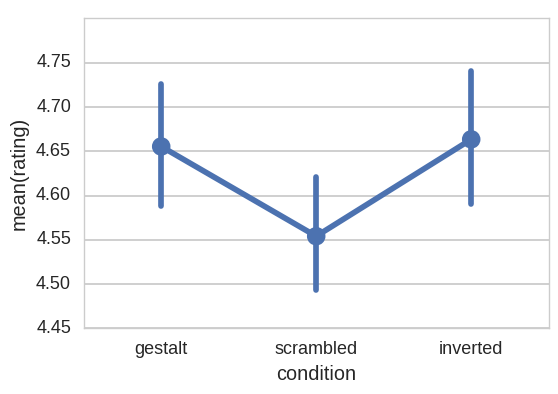

In [16]:
#sns.violinplot(x="condition", y="rating.response", data=dfApp);
sns.pointplot(x="condition", y="rating", unit="participant", data=dfApp);


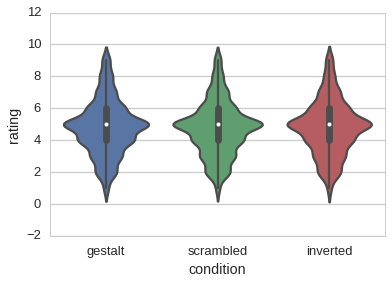

In [13]:
sns.violinplot(x="condition", y="rating", data=dfApp);

In [17]:
# GLM test

model = smf.glm(formula="rating ~ condition", data=dfApp)
#model = smf.ols(formula="rating ~ condition", data=dfApp)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:                 6391
Model:                            GLM   Df Residuals:                     6388
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                   2.77706161598
Method:                          IRLS   Log-Likelihood:                -12331.
Date:                 zo, 06 nov 2016   Deviance:                       17740.
Time:                        02:46:07   Pearson chi2:                 1.77e+04
No. Iterations:                     4                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  4.6554      0.035    134.268      0.000         4.587     4.723
condition[T.inve

## Interim conclusion: 

* scrambling effect is nonsignificant but in expected direction (less liked).
* Nonsignificance may be a power problem (original study had more participants)
* Inversion does not seem to matter, meaning it probably is not an (implicitly processed) "familiar Gestalt" effect.

* TODO: run another batch of about 40 participants? item effect toevoegen. Within-item?

## Correlation between individual difference scores (appreciation of Gestalt minus scrambled patterns) and PNS scores

In [18]:
# compute diff score to correlate with PNS score

print(len(dfApp['participant'].unique()))

def diffScore(df):
    
    gestaltm =  df[df.condition=='gestalt'].rating.mean()
    scrambledm = df[df.condition=='scrambled'].rating.mean()
    
    diff= gestaltm - scrambledm
    
    #df['id'].iloc[0]
    dfout = pd.DataFrame(data=[(gestaltm, scrambledm, diff)], columns=['gestaltm', 'scrambledm', 'diff'])
    
    return dfout

dfdiff = dfApp.groupby('participant').apply(diffScore)
dfdiff = dfdiff.reset_index()


# add PNS scores
dfPNS = pd.read_table("ScoringPNS.csv", sep=",") 
dfPNS = dfPNS.iloc[4:,:]
dfPNS["participant"] = pd.to_numeric(dfPNS["participant"])
dfmerged= pd.merge(dfdiff, dfPNS, how='outer', on='participant')
dfmerged.head()


77


,participant,level_1,gestaltm,scrambledm,diff,Geslacht,Geboortejaar,Totaalscore
0,5635,0.0,4.900000,4.133333,0.766667,NaN,NaN,NaN
1,7333,0.0,4.800000,4.733333,0.066667,NaN,NaN,NaN
2,7576,0.0,2.233333,2.133333,0.100000,NaN,NaN,NaN
3,9010,0.0,5.000000,4.966667,0.033333,vrouw,1992.0,59.0
4,11485,0.0,5.233333,5.000000,0.233333,NaN,NaN,NaN


### Does higher PNS (personal need for structure) imply higher relative appreciation of Gestalt vs scrambled patterns?

0.10129870129870132

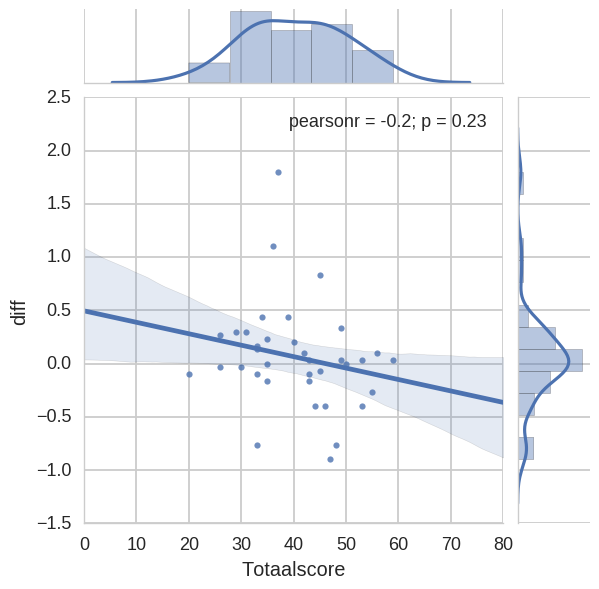

In [19]:
sns.jointplot(x="Totaalscore", y="diff", data=dfmerged, kind="reg");
dfmerged["diff"].mean()

## Interim conclusion

* Nonsign correlation
* Trend in direction opposite to expected: higher PNS -> less liking of Gestalt vs scrambled.
* This outcome is what would be expected if the "Gestalt-effect" is not actually caused by coherent Gestalt, but by more basic image feature not related to PNS?

# Numerosity experiment


* 2-IFC: which has the most dots (first or second image)
* Note that all comparison images have exactly the same numbers of dots in reality
* Hence any deviation from .50 is caused by the difference in configuration

Relevant vars:

* acc: percentage choice for first image
* rt
* condition

In [21]:
#print dfNum.columns
#print dfNum.dtypes
dfNum = dfNum.rename(columns={'numResp.corr': 'acc','numResp.rt': 'rt', 'numResp.Alocation': 'Alocation' })


In [15]:
dfNum.columns
#dfNum["condition"].loc[dfNum.condition== "Inverted-scrambled"]= "Scrambled-Inverted"

### Does Gestaltness (and inversion) influence numerosity estimation?

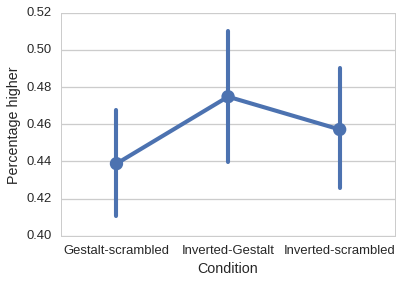

In [23]:
sns.pointplot(x="condition", y="acc",unit="participant", data=dfNum);
sns.axlabel("Condition", "Percentage higher")

#sns.stripplot(x="condition", y="acc",unit="participant", data=dfNum, jitter=True);

In [24]:
model = smf.glm(formula="acc ~ condition", data=dfNum,  family=sm.families.Binomial())

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    acc   No. Observations:                 2812
Model:                            GLM   Df Residuals:                     2809
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1936.6
Date:                 vr, 27 mei 2016   Deviance:                       3873.1
Time:                        18:06:31   Pearson chi2:                 2.81e+03
No. Iterations:                     6                                         
                                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                          -0.2463      0.060     -4.072      0.000        -0.365

# Checking for low-level structural measures of the test images

In [25]:
# prerequisites

import os, re
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage.morphology import skeletonize, convex_hull_image, disk
from skimage import io
from skimage.measure import label, regionprops
from skimage.filters.rank import entropy
from skimage.feature import peak_local_max



def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')


## Compute measures: convex hull area and density


### Convex hull area

* [Convex hull docs](http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_morphology.html#convex-hull): putting an elastic band around all elements to form the smallest possible convex polygon
* Intuitively the area depends on how much the points are spread out.
* One possible measure of clustering/compactness

### Density 

* For each dot: mean of distances to 3 closest neighbors, averaged over all dots


In [65]:
from itertools import repeat

def distance(p1,p2):
    """Euclidean distance between two points."""
    x1,y1 = p1
    x2,y2 = p2
    return np.hypot(x2 - x1, y2 - y1)


# get data file names
files = gui.fileOpenDlg("../images", allowed="bmp files (*.bmp)|*.bmp")

d = []

for filename in files:
    
    #print(filename)
    stim = io.imread(filename, as_grey=True)
    stim = img_as_ubyte(io.imread(filename, as_grey=True))
    #fig, ax = plt.subplots()
    #ax.imshow(stim, cmap=plt.cm.gray)
    
    #compute convex hull for this img
    
    chull = convex_hull_image(stim == 0)
    #plot_comparison(stim, chull, 'convex hull')
    label_img = label(chull)
    regions_img = regionprops(label_img)
    region = regions_img[0]

    hull= float(region.convex_area)/(chull.shape[0]*chull.shape[1])
    #print "percentage pixels of convex hull image: ", hull
    
    #compute density for this img
    
    stim = numpy.invert(stim) # peaks should be white
    # extract peaks aka dots
    coords = peak_local_max(stim, min_distance=1) 
    #print coords
    #print len(coords)
    #print len(stim[stim>.5])
    
    #compute density as mean of distances to 3 closest neighbors
    
    density = 0
    for p1 in coords:
        
        dists = [distance(*pair) for pair in zip(repeat(p1),coords)]
        sorted_dists = np.sort(dists)[1:6] # take only distances to 3 closest neighbors 
        av_dist = np.mean(sorted_dists)
        density += av_dist
        #print "dists: ", len(dists)
        #print "sorted: ", sorted_dists
        #print "average: ", av_dist 

    density /= len(coords)  
    
    d.append({'images': filename.split("GestaltAppreciation/")[1] ,'hull': hull, 'density': 1/density})

#print(d)                 
stims = pd.DataFrame(d)


In [68]:
dfmerged= pd.merge(dfApp, stims, how='outer', on='images')


In [67]:
#stims.loc[:,"img"]= stims.images.str.extract("(\d+)")
#stims.loc[:,['density','img']].sort_values('img')

### How is convex hull area distributed? (over images)

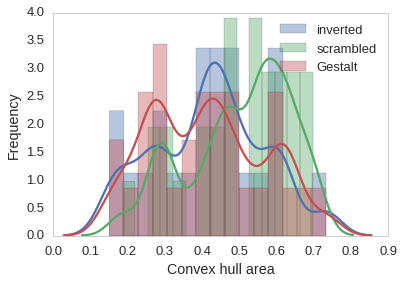

In [69]:
sns.distplot(dfmerged[dfmerged.condition=="inverted"].hull, bins=15, label="inverted");
sns.distplot(dfmerged[dfmerged.condition=="scrambled"].hull, bins=15, label="scrambled");
sns.distplot(dfmerged[dfmerged.condition=="gestalt"].hull, bins=15, label="Gestalt");
plt.legend();
sns.axlabel("Convex hull area", "Frequency")


### Does convex hull area differ across conditions? 

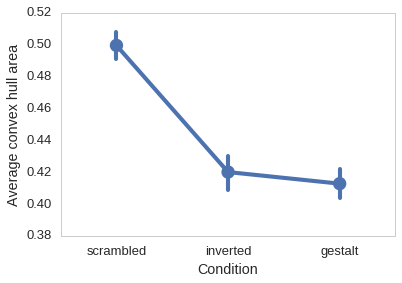

In [71]:
sns.pointplot(x="condition", y="hull", data=dfmerged, linestyles=["-"]);
sns.axlabel("Condition", "Average convex hull area")

In [72]:
# GLM test

model = smf.glm(formula="hull ~ condition", data=dfmerged)
#model = smf.ols(formula="rating ~ hull", data=dfmerged)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   hull   No. Observations:                 3071
Model:                            GLM   Df Residuals:                     3068
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                 0.0214865558155
Method:                          IRLS   Log-Likelihood:                 1540.8
Date:                 vr, 27 mei 2016   Deviance:                       65.921
Time:                        18:44:47   Pearson chi2:                     65.9
No. Iterations:                     4                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0.4126      0.004     93.790      0.000         0.404     0.421
condition[T.inve

### Interim conclusion

* As expected, convex hull area is significantly higher in the scrambled condition (compared to Gestalt or inverted)
* Inversion does not matter (obviously). It is not exactly the same as Gestalt because some images were not inverted (see notes at top)

### Are ratings dependent on convex hull area, in the different conditions?

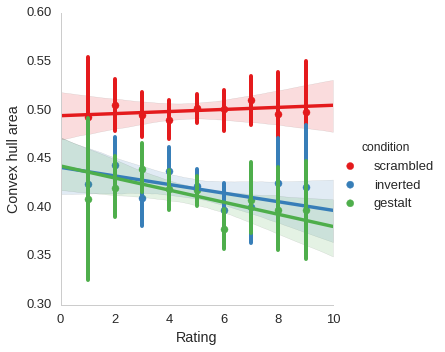

In [73]:
sns.lmplot(x="rating", y="hull", hue="condition", data=dfmerged, x_estimator=np.mean, palette="Set1");
sns.axlabel("Rating", "Convex hull area")
sns.set_style("whitegrid",{"axes.grid": False})

In [74]:
# GLM test

model = smf.glm(formula="rating ~ condition * hull", data=dfmerged)
#model = smf.ols(formula="rating ~ hull", data=dfmerged)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:                 3071
Model:                            GLM   Df Residuals:                     3065
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                   2.84139269564
Method:                          IRLS   Log-Likelihood:                -5958.1
Date:                 vr, 27 mei 2016   Deviance:                       8708.9
Time:                        18:45:12   Pearson chi2:                 8.71e+03
No. Iterations:                     4                                         
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                       5.1339      0.146     35.220      0.000         4.848     5.420
c

### Interim conclusion: 

* If we add hull area to the model (and interaction with condition) for DV rating:
* Hull significantly influences ratings
* Interestingly the main scrambling effect also becomes significant here
* Interaction scramblingxhull is also (marginally) significant. As can be seen in the graph, this is because within the scrambling condition, hull does not seem to influence ratings much. This is only the case for the inverted and the Gestalt condition, specifically, both show a (similar) negative correlation.
* Together this seems to indicate that ratings are determined by low-level structural differences rather than high-level Gestalt or coherence.


### How is density distributed? (over images)

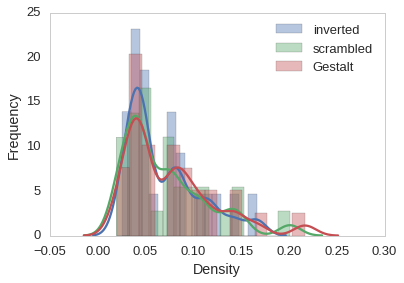

In [75]:
sns.distplot(dfmerged[dfmerged.condition=="inverted"].density, bins=15, label="inverted");
sns.distplot(dfmerged[dfmerged.condition=="scrambled"].density, bins=15, label="scrambled");
sns.distplot(dfmerged[dfmerged.condition=="gestalt"].density, bins=15, label="Gestalt");
plt.legend();
sns.axlabel("Density", "Frequency")

### Does density differ across conditions? 

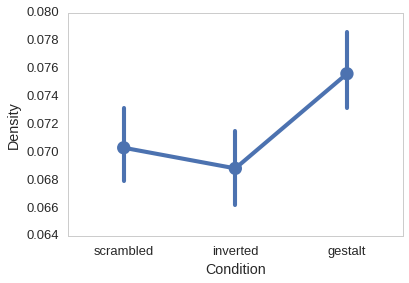

In [76]:
sns.pointplot(x="condition", y="density", data=dfmerged, linestyles=["-"]);
sns.axlabel("Condition", "Density")

In [77]:
# GLM test

model = smf.glm(formula="density ~ condition", data=dfmerged)
#model = smf.ols(formula="rating ~ hull", data=dfmerged)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                density   No. Observations:                 3071
Model:                            GLM   Df Residuals:                     3068
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                0.00185443238395
Method:                          IRLS   Log-Likelihood:                 5302.5
Date:                 vr, 27 mei 2016   Deviance:                       5.6894
Time:                        18:45:27   Pearson chi2:                     5.69
No. Iterations:                     4                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0.0756      0.001     58.498      0.000         0.073     0.078
condition[T.inve

### Interim conclusion

* Density differs in the three conditions.
* Inverted imgs should have same density but as Gestalt but because some images were not inverted this is not the case (see notes at top)

### Are ratings dependent on density, in the different conditions?

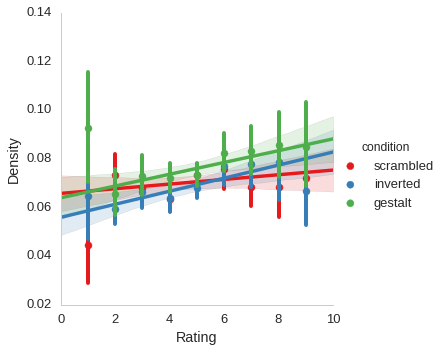

In [78]:
sns.lmplot(x="rating", y="density", hue="condition", data=dfmerged, x_estimator=np.mean, palette="Set1");
sns.axlabel("Rating", "Density")
sns.set_style("whitegrid",{"axes.grid": False})

In [79]:
# GLM test

model = smf.glm(formula="rating ~ condition * density", data=dfmerged)
#model = smf.ols(formula="rating ~ hull", data=dfmerged)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 rating   No. Observations:                 3071
Model:                            GLM   Df Residuals:                     3065
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                   2.82762397338
Method:                          IRLS   Log-Likelihood:                -5950.6
Date:                 vr, 27 mei 2016   Deviance:                       8666.7
Time:                        18:49:27   Pearson chi2:                 8.67e+03
No. Iterations:                     4                                         
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
Intercept                          4.5698      0.097     47.195      0.000         4.380   

### Interim conclusion: 

* If we add density to the model (and interaction with condition) for DV rating:
* Density significantly influences ratings (higher density -> higher rating)
* No other significant relations.


## Is there a correlation between density and convex hull area? (Yes, a negative one, as expected)

In [5]:
sns.jointplot(x="density", y="hull", data=dfmerged, kind="reg")

NameError: name 'dfmerged' is not defined

In [1]:
# TODO: too many datapoints

Grouping & Numerosity studies:
http://www.ncbi.nlm.nih.gov/pubmed/26451701?dopt=Abstract 
http://pec.sagepub.com/content/20/5/681.abstract?id=p200681
http://www.sciencedirect.com/science/article/pii/0001691887900588
http://en.cnki.com.cn/Article_en/CJFDTOTAL-XLXB201210005.htm
http://www.journalofvision.org/content/13/8/5.full
http://www.amsciepub.com/doi/abs/10.2466/04.22.24.27.PMS.111.5.379-398
http://www.sciencedirect.com/science/article/pii/S0010027709001619
http://link.springer.com/article/10.3758/s13414-012-0349-1
http://www.jstor.org/stable/1419789
http://www.plosone.org/article/info%3Adoi%2F10.1371%2Fjournal.pone.0077556#s7
http://link.springer.com/article/10.3758/PBR.16.3.509
http://psycnet.apa.org/journals/xge/67/5/458/
http://www.sciencedirect.com/science/article/pii/0001691887900588
http://journal.frontiersin.org/article/10.3389/fpsyg.2015.01364/full

Stimuli:
- Ask original stimuli. Method of Topolinski: (Topolinski & Strack 1990): "First, we developed and tested a set of pictorial stimuli that were useful for intuitive judgments because they were so degraded that they could only rarely be visually recognized (Bower et al., 1990). We used 30 black-and-white drawings of everyday objects randomly chosen from the inventory by Snodgrass and Vanderwart (1980), with the only constraint being that depicted objects were visually not too simple (e.g., a circle). Following Volz and von Cramon (2006), these stimuli were visually degraded by a filter that masked the black picture on the white background by increasing the white pixels by 75%. These pictures were the object condition (Volz & von Cramon, 2006) since they depicted visually degraded real objects. Then, these pictures were divided into nine equal rectangles (3 3); and these rectangles were randomly rotated within the picture (Volz & von Cramon, 2006; cf., Bower et al., 1990; Wippich, 1994). Thus, these pictures contained the same pixel information as in the object condition and even contained local collinearities (Volz & von Cramon, 2006), but the picture as a whole depicted a physically impossible and thus meaningless object. These pictures were used in the nonobject condition."
- generate own set? (GERT)
- with all elements, check jittered version recognizable, then degrade (limit nb elements)
- which mask? Masking necessary?
- what about informativeness of contour elements

Control stimuli:
- density cue control-> check w Maarten-> possible control stim with same distance histogram
- keep nb of elements constant for coherent vs control


Procedure:
- 2AFC for preference (side-by-side) and for numerosity (which one has more dots?)
- double nb of stimuli & pp to increase power?

Other ideas:
- Possibly interesting variation: subliminal priming with consistent vs inconsistent playing cards